In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 1. Dataset
Loading dataset from keras, dataset description.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
help(imdb)
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Help on module keras.datasets.imdb in keras.datasets:

NAME
    keras.datasets.imdb - IMDB sentiment classification dataset.

FUNCTIONS
    get_word_index(path='imdb_word_index.json')
        Retrieves the dictionary mapping words to word indices.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
        
        # Returns
            The word index dictionary.
    
    load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
        Loads the IMDB dataset.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
            num_words: max number of words to include. Words are ranked
                by how often they occur (in the training set) and only
                the most frequent words are kept
            skip_top: skip the top N most frequently occurring words
                (which may not be informative)

### 2. Preparing the data with one-hot-encoding
labels also vectorized and converted to floats

In [4]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3. Building and training a model

In [5]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train, partial_y_train, \
                    epochs = 20, \
                    batch_size = 512, \
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.4919 - acc: 0.7546 - val_loss: 0.3037 - val_acc: 0.8773
Epoch 2/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2510 - acc: 0.9017 - val_loss: 0.4810 - val_acc: 0.8244
Epoch 3/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1837 - acc: 0.9296 - val_loss: 0.3069 - val_acc: 0.8863
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1213 - acc: 0.9557 - val_loss: 0.3314 - val_acc: 0.8821
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0864 - acc: 0.9729 - val_loss: 0.3746 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0531 - acc: 0.9833 - val_loss: 0.4173 - val_acc: 0.8831
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0840 - acc: 0.9811 - val_loss: 0.3958 - val_ac

### 4. History of training

In [9]:
# help(history)
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


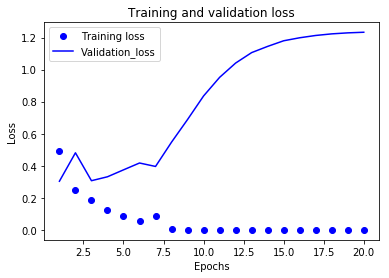

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label  ='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

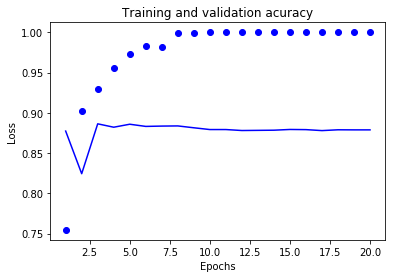

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation acuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.show()

### 5. Retraining new model

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step
[0.32315461079597474, 0.87348]


In [13]:
results

[0.32315461079597474, 0.87348]

In [15]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.4399 - acc: 0.8151
Epoch 2/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2429 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1876 - acc: 0.9317
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step
[0.36459576663017274, 0.86784]
